# Decision Trees

In [248]:
import pandas as pd 
import numpy as np 

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns
import statistics

# import graphviz
import pydotplus
import io
from scipy import misc

%matplotlib inline

In [249]:
# Import Feature Set
%store -r master
%store -r feature_set_1
%store -r feature_set_2
%store -r feature_set_3

In [250]:
#Function that generates the decision tree visualizations
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = plt.imread(path)
    plt.rcParams['figure.figsize'] = (20,20)
    plt.imshow(img)

In [251]:
def k_fold_dt (model,X,Y):

    # Perform K-fold cross validation to make training and testing datasets, k = 10
    kf = KFold(n_splits=10)
    i = 1 #counter for iterations
    acc_set = []

    for training, testing in kf.split(X):
        print("-------------------------- start k =",i,"--------------------------")
        #Define testing and training row indices (indicates which rows fall under which dataset)
        print("Train Index: ", training, "\n")
        print("Test Index: ", testing, "\n")
        min_tr = min(training)
        max_tr = max(training)
        min_test = min(testing)
        max_test = max(testing)
        X_training_data = X.iloc[min_tr:(max_tr+1)]
        X_testing_data = X.iloc[min_test:(max_test+1)]
        Y_training_data = Y.iloc[min_tr:(max_tr+1)]
        Y_testing_data = Y.iloc[min_test:(max_test+1)]

        #Fit model
        model.fit(X_training_data, Y_training_data)

        #Determine accuracy score
        class_predict = model.predict(X_testing_data)
        acc_score = accuracy_score(Y_testing_data, class_predict)
        print("Accuracy Score: ", acc_score, "\n")
        print("-------------------------- end k =",i,"--------------------------","\n")
        
        acc_set.append(acc_score)
        i += 1
        
    return model, acc_set

## FEATURE SET 1

In [252]:
# Set X as features data (remove class variable and player name)
feature_set_1 = feature_set_1.dropna()
X = feature_set_1.drop('MIP',axis=1).drop('Player', axis=1)
feature_names1 = list(X.columns)

In [253]:
#Set Y as target class
Y = feature_set_1.MIP

In [254]:
#Initialize the model
dt_model_1 = DecisionTreeClassifier(min_samples_split=100)
dt_1 = k_fold_dt(dt_model_1,X,Y)[0]
acc_set1 = k_fold_dt(dt_model_1,X,Y)[1]
print("Accuracy Score Set",acc_set1,"\n")
avg_acc1 = statistics.mean((acc_set1))

-------------------------- start k = 1 --------------------------
Train Index:  [ 404  405  406 ... 4036 4037 4038] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 2

Accuracy Score:  0.9727722772277227 

-------------------------- end k = 2 -------------------------- 

-------------------------- start k = 3 --------------------------
Train Index:  [   0    1    2 ... 4036 4037 4038] 

Test Index:  [ 808  809  810  811  812  813  814  815  816  817  818  819  820  821
  822  823  824  825  826  827  828  829  830  831  832  833  834  835
  836  837  838  839  840  841  842  843  844  845  846  847  848  849
  850  851  852  853  854  855  856  857  858  859  860  861  862  863
  864  865  866  867  868  869  870  871  872  873  874  875  876  877
  878  879  880  881  882  883  884  885  886  887  888  889  890  891
  892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958

### Decision Tree 1

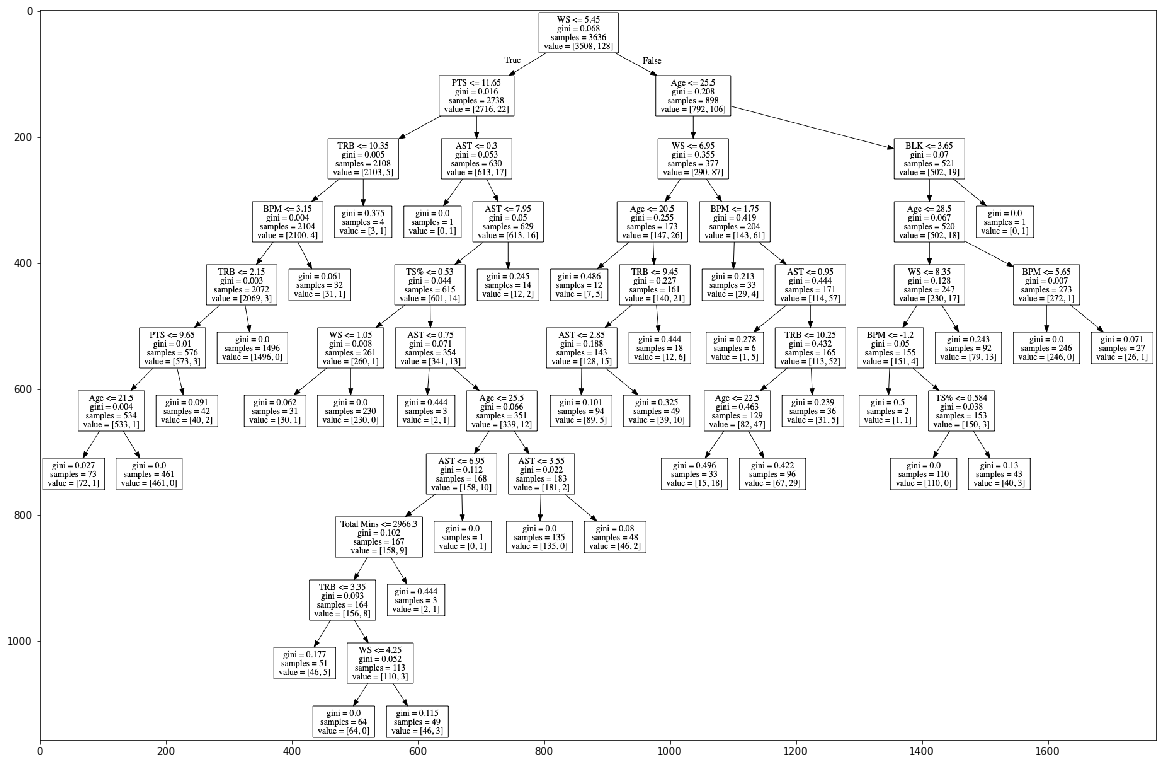

In [255]:
show_tree(dt_1, feature_names1, 'decision_tree_1')

## FEATURE SET 2

In [256]:
# Set X as features data (remove class variable and player name)
feature_set_2 = feature_set_2.dropna()
X2 = feature_set_2.drop('MIP',axis=1).drop('Player', axis=1)
feature_names2 = list(X2.columns)
#Set Y as target class
Y2 = feature_set_2.MIP

In [257]:
#Initialize the model
dt_model_2 = DecisionTreeClassifier(min_samples_split=100)
dt_2 = k_fold_dt(dt_model_2,X2,Y2)[0]
acc_set2 = k_fold_dt(dt_model_1,X2,Y2)[1]
print("Accuracy Score Set",acc_set2,"\n")
avg_acc2 = statistics.mean((acc_set2))

-------------------------- start k = 1 --------------------------
Train Index:  [ 373  374  375 ... 3722 3723 3724] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 2

Accuracy Score:  0.9758713136729222 

-------------------------- end k = 2 -------------------------- 

-------------------------- start k = 3 --------------------------
Train Index:  [   0    1    2 ... 3722 3723 3724] 

Test Index:  [ 746  747  748  749  750  751  752  753  754  755  756  757  758  759
  760  761  762  763  764  765  766  767  768  769  770  771  772  773
  774  775  776  777  778  779  780  781  782  783  784  785  786  787
  788  789  790  791  792  793  794  795  796  797  798  799  800  801
  802  803  804  805  806  807  808  809  810  811  812  813  814  815
  816  817  818  819  820  821  822  823  824  825  826  827  828  829
  830  831  832  833  834  835  836  837  838  839  840  841  842  843
  844  845  846  847  848  849  850  851  852  853  854  855  856  857
  858  859  860  861  862  863  864  865  866  867  868  869  870  871
  872  873  874  875  876  877  878  879  880  881  882  883  884  885
  886  887  888  889  890  891  892  893  894  895  896

### Decision Tree 2

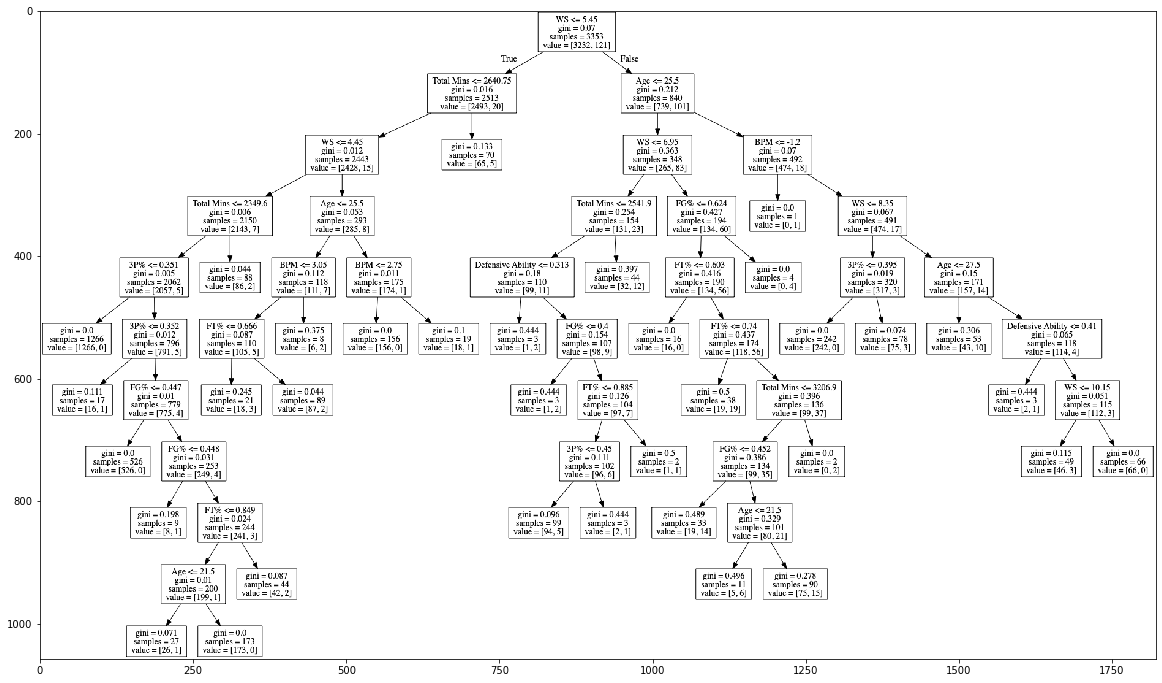

In [258]:
show_tree(dt_2, feature_names2, 'decision_tree_2')

## FEATURE SET 3

In [259]:
# Set X as features data (remove class variable and player name)
feature_set_3 = feature_set_3.dropna()
X3 = feature_set_3.drop('MIP',axis=1).drop('Player', axis=1)
feature_names3 = list(X3.columns)
#Set Y as target class
Y3 = feature_set_3.MIP

In [260]:
#Initialize the model
dt_model_3 = DecisionTreeClassifier(min_samples_split=100)
dt_3 = k_fold_dt(dt_model_3,X3,Y3)[0]
acc_set3 = k_fold_dt(dt_model_1,X3,Y3)[1]
print("Accuracy Score Set",acc_set3,"\n")
avg_acc3 = statistics.mean((acc_set3))


-------------------------- start k = 1 --------------------------
Train Index:  [ 267  268  269 ... 2662 2663 2664] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 2

Accuracy Score:  0.9625468164794008 

-------------------------- end k = 5 -------------------------- 

-------------------------- start k = 6 --------------------------
Train Index:  [   0    1    2 ... 2662 2663 2664] 

Test Index:  [1335 1336 1337 1338 1339 1340 1341 1342 1343 1344 1345 1346 1347 1348
 1349 1350 1351 1352 1353 1354 1355 1356 1357 1358 1359 1360 1361 1362
 1363 1364 1365 1366 1367 1368 1369 1370 1371 1372 1373 1374 1375 1376
 1377 1378 1379 1380 1381 1382 1383 1384 1385 1386 1387 1388 1389 1390
 1391 1392 1393 1394 1395 1396 1397 1398 1399 1400 1401 1402 1403 1404
 1405 1406 1407 1408 1409 1410 1411 1412 1413 1414 1415 1416 1417 1418
 1419 1420 1421 1422 1423 1424 1425 1426 1427 1428 1429 1430 1431 1432
 1433 1434 1435 1436 1437 1438 1439 1440 1441 1442 1443 1444 1445 1446
 1447 1448 1449 1450 1451 1452 1453 1454 1455 1456 1457 1458 1459 1460
 1461 1462 1463 1464 1465 1466 1467 1468 1469 1470 1471 1472 1473 1474
 1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485

## Accuracy Scores

In [261]:
print("Mean Accuracy Score - DT 1:",avg_acc1)
print("Mean Accuracy Score - DT 2:",avg_acc2)
print("Mean Accuracy Score - DT 3:",avg_acc3)

Mean Accuracy Score - DT 1: 0.9658335994889812
Mean Accuracy Score - DT 2: 0.9664410908357116
Mean Accuracy Score - DT 3: 0.9590999971839711


### The highest accuracy score is for Decision Tree 2